## Imports
Import the necessary Python libraries for this notebook.  

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.grid'] = False


Show the columns in the dataset.

In [33]:
df = pd.read_csv("Student Mental health.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Reivew the columns to determine datatypes and missing values.

In [34]:
# Types, counts
display(df.info())
display(df.describe(include='all'))

# Missingness table
missing = df.isna().sum().to_frame('missing')
missing['missing_%'] = (df.isna().mean()*100).round(2)
missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

None

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
count,101,101,100.00000,101,101,101,101,101,101,101,101
unique,92,2,NaN,49,7,6,2,2,2,2,2
top,8/7/2020 12:39,Female,NaN,BCS,year 1,3.50 - 4.00,No,No,No,No,No
freq,3,75,NaN,18,41,47,85,66,67,68,95
mean,NaN,NaN,20.53000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.49628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,19.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,missing,missing_%
Timestamp,0,0.00
Choose your gender,0,0.00
Age,1,0.99
What is your course?,0,0.00
Your current year of Study,0,0.00
What is your CGPA?,0,0.00
Marital status,0,0.00
Do you have Depression?,0,0.00
Do you have Anxiety?,0,0.00
Do you have Panic attack?,0,0.00


Light Cleaning for Relevant Columns.

In [35]:
df = df.copy()

import numpy as np
import re

# 1) Normalize text
cg = df['What is your CGPA?'].astype(str)
cg = cg.str.strip()
cg = cg.str.replace('\u2013', '-', regex=False)  # en dash → hyphen
cg = cg.str.replace('\u2014', '-', regex=False)  # em dash → hyphen
cg = cg.str.replace('–', '-', regex=False)       # safety
cg = cg.str.replace('—', '-', regex=False)       # safety
cg = cg.str.replace(r'\s+', ' ', regex=True)     # collapse multiple spaces

# 2) Function to compute midpoint from "a - b" or coerce direct numbers
def cgpa_to_mid(s):
    s = s.strip()
    # If it's already a number like "3.25"
    try:
        return float(s)
    except ValueError:
        pass
    # Try to parse ranges like "3.00 - 3.49"
    m = re.match(r'^(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)$', s)
    if m:
        lo = float(m.group(1))
        hi = float(m.group(2))
        return (lo + hi) / 2.0
    return np.nan  # unparseable → NaN

df['CGPA_mid'] = cg.apply(cgpa_to_mid)

# Make sure it's numeric
df['CGPA_mid'] = pd.to_numeric(df['CGPA_mid'], errors='coerce')


Plot histograms and bar charts.

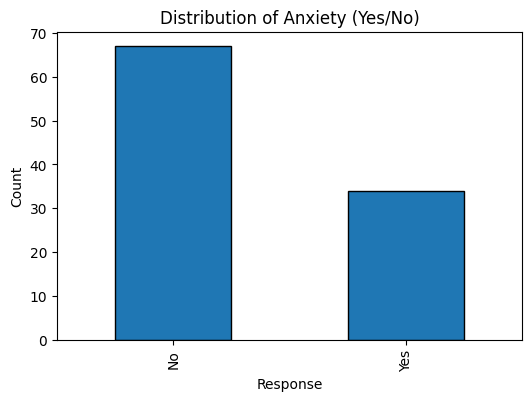

In [36]:
vc = df['Do you have Anxiety?'].value_counts(dropna=False)
ax = vc.plot(kind='bar', edgecolor='black')
ax.set_title('Distribution of Anxiety (Yes/No)')
ax.set_xlabel('Response')
ax.set_ylabel('Count')
plt.show()

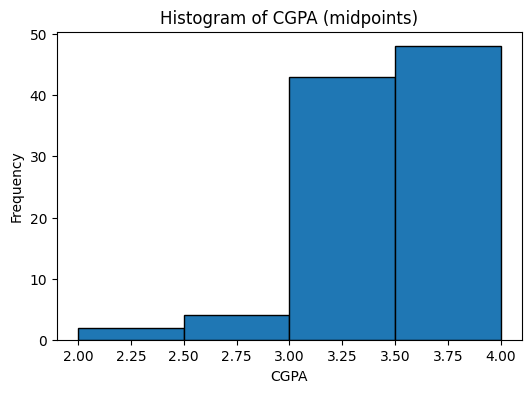

count    101.000000
mean       3.356287
std        0.585152
min        0.995000
25%        3.245000
50%        3.245000
75%        3.750000
max        3.750000
Name: CGPA_mid, dtype: float64

In [37]:
series = df['CGPA_mid'].dropna()
plt.hist(series, bins=[2.0,2.5,3.0,3.5,4.0], edgecolor='black')
plt.title('Histogram of CGPA (midpoints)')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

series.describe()


- GPA Distribution is skewed towared higher values with most students beting between 3.0 and 3.75.  
- The mean GPA is 3.36 and the median is 3.25, so they are not extremely skewed.  
- There is a minimum value of .995 which is most likely a mistake and will need to be removed.

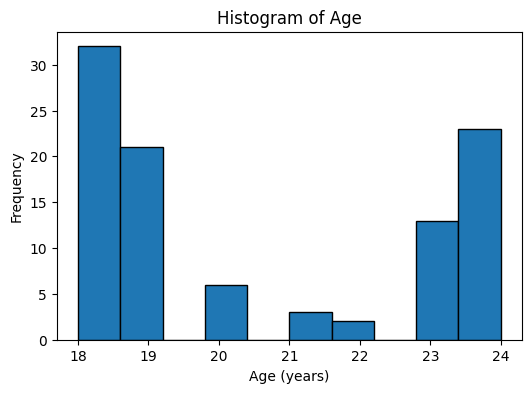

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

In [38]:
age = df['Age'].dropna()
plt.hist(age, bins=10, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

age.describe()


Just to see what the ages looked like, I wanted a historgram for this.  Ages are mostly 18-19 and 23-24.

## Transformations
- I have already converted GPA ranges such as 3.00 – 3.49 into their midpoint value (3.25) to treat GPA as continuous data to view the histogram above.
- Binary-encode Anxiety responses:  Replace No with "0" and Yes with "1".

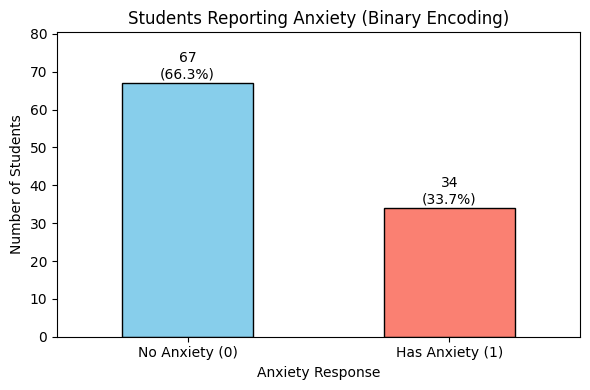

<Figure size 600x400 with 0 Axes>

In [40]:
df['Anxiety_bin'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Anxiety_bin'].value_counts()
df['Anxiety_bin'].value_counts(normalize=True)


# Value counts (sort by index so 0 appears first, 1 second)
counts = df['Anxiety_bin'].value_counts().sort_index()

# Bar chart
ax = counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Labels and title
ax.set_xticklabels(['No Anxiety (0)', 'Has Anxiety (1)'], rotation=0)
ax.set_title('Students Reporting Anxiety (Binary Encoding)')
ax.set_xlabel('Anxiety Response')
ax.set_ylabel('Number of Students')

# Add count labels on top of bars
for i, value in enumerate(counts):
    ax.text(i, value + 0.5, f'{value}\n({value/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.margins(y=0.2)   # adds 20% vertical margin above highest bar
plt.show()


plt.tight_layout()
plt.show()

